In [9]:
%load_ext autoreload
%autoreload 2

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
from waymo_object import WaymoObject, show_lidar_with_depth, show_lidar_on_image, \
                         show_image_with_boxes, show_lidar_topview_with_boxes


In [11]:
from xvfbwrapper import Xvfb
vdisplay = Xvfb(width=1920, height=1080)
vdisplay.start()
from mayavi import mlab
mlab.init_notebook('ipy') # do not use 'x3d' backend which leads to color missing

/root/miniconda3/envs/kitti_vis/lib/python3.7/site-packages/traits/etsconfig/etsconfig.py:415: UserWarning: Environment variable "HOME" not set, setting home directory to /tmp
  % (environment_variable, parent_directory)


Notebook initialized with ipy backend.


In [12]:
from avcv.utils import *

In [13]:
# !ls /data/waymo/training_kitti/label_0/ | wc

In [16]:
data_root = '/data/waymo/training_kitti/'
dataset_name = 'waymo'
image_ext='png' if dataset_name == 'kitti' else 'jpg'
_paths = glob(f'{data_root}/label_2/*')
ids = [int(os.path.basename(path).split('.')[0]) for path in _paths]
dataset = WaymoObject(data_root, image_ext=image_ext, image_dir='image_0', label_dir='label_0')


In [17]:
data_idx = ids[3]
objects = dataset.get_label_objects(data_idx)
# objects = dataset.get_pred_objects(data_idx)
calib = dataset.get_calibration(data_idx)
img = dataset.get_image(data_idx)
img_height, img_width, _ = img.shape


# 2D

In [18]:
calib.P.astype(int)

array([[2045,    0,  950,    0],
       [   0, 2045,  640,    0],
       [   0,    0,    1,    0]])

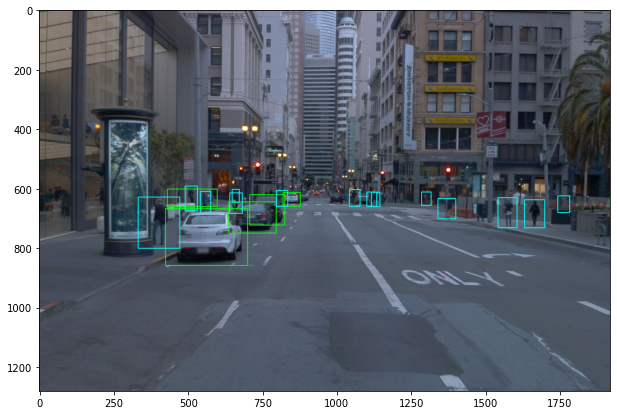

In [19]:
img_bbox2d, img_bbox3d = show_image_with_boxes(img, objects, calib)
img_bbox2d = cv2.cvtColor(img_bbox2d, cv2.COLOR_BGR2RGB)

fig_bbox2d = plt.figure(figsize=(14, 7))
ax_bbox2d = fig_bbox2d.subplots()
ax_bbox2d.imshow(img_bbox2d)
plt.show()

# 3D

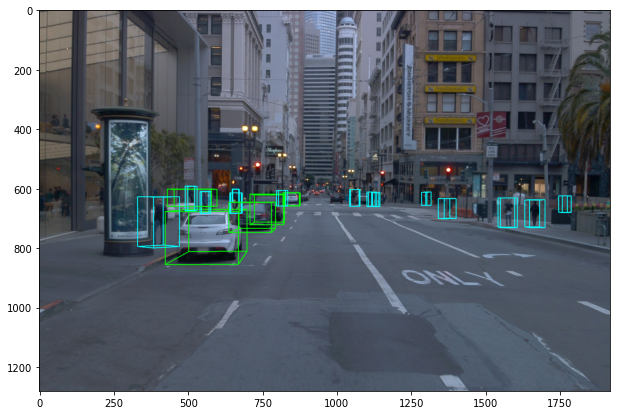

In [20]:
img_bbox3d = cv2.cvtColor(img_bbox3d, cv2.COLOR_BGR2RGB)

fig_bbox3d = plt.figure(figsize=(14, 7))
ax_bbox3d = fig_bbox3d.subplots()
ax_bbox3d.imshow(img_bbox3d)
plt.show()

# Lidar

In [21]:
#--plot lidar
# pc_velo = dataset.get_lidar(data_idx)

# fig_3d = mlab.figure(bgcolor=(0, 0, 0), size=(800, 450))
# show_lidar_with_depth(pc_velo, objects, calib, fig_3d, True, img_width, img_height)
# fig_3d
# img_lidar = show_lidar_on_image(pc_velo[:, :3], img, calib, img_width, img_height)
# img_lidar = cv2.cvtColor(img_lidar, cv2.COLOR_BGR2RGB)

# fig_lidar = plt.figure(figsize=(14, 7))
# ax_lidar = fig_lidar.subplots()
# ax_lidar.imshow(img_lidar)
# plt.show()

# Bird eye view

In [22]:
# img_bev = show_lidar_topview_with_boxes(pc_velo, objects, calib)

# fig_bev = plt.figure(figsize=(7, 14))
# ax_bev = fig_bev.subplots()
# ax_bev.imshow(img_bev)
# plt.show()

In [12]:
!